In [1]:
# για το scraping
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# για τα nan values
import numpy as np

# για τα γραφήματα
import matplotlib.pyplot as plt

# για την επεξεργασία ελληνικών κειμένων
import spacy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path1='/content/drive/MyDrive/Colab Notebooks'

In [4]:
!python -m spacy download el_core_news_sm


2023-07-09 08:20:39.498755: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 46.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [5]:

start_page = 2
end_page = 15

start_url = "https://www.newsit.gr/page/?s=%CF%80%CE%BF%CE%BB%CE%B9%CF%84%CE%B9%CF%83%CE%BC%CF%8C%CF%82"

test_url = start_url + str(start_page)

In [6]:
response = requests.get(start_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [7]:
teaser_articles_list = doc.find('div', {'class': 'content-area grid-parent mobile-grid-100 grid-75 tablet-grid-75'}).find_all('article')

Το θέμα μας είναι πολιτισμός.

In [8]:
import requests
from bs4 import BeautifulSoup

url = "https://www.newsit.gr/page/2/?s=%CF%80%CE%BF%CE%BB%CE%B9%CF%84%CE%B9%CF%83%CE%BC%CF%8C%CF%82"

response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

teaser_articles_list = soup.find('div', {'class': 'content-area grid-parent mobile-grid-100 grid-75 tablet-grid-75'}).find_all('article')

for article in teaser_articles_list:
    link = article.find('a')['href']



In [11]:
print(teaser_articles_list[0].prettify())

<article class="">
 <div class="image has-video">
  <a href="https://www.newsit.gr/ellada/o-dimos-athinaion-allazei-ton-xarti-tis-polis-trietes-sxedio-gia-ton-politismo-video/3269168/" style="background-image:url('https://www.newsit.gr/wp-content/uploads/2021/04/Athina_video_dimosAthinaion_politismos_22_04_2021-768x322.jpg');" title="Ο Δήμος Αθηναίων αλλάζει τον χάρτη της πόλης – Τριετές σχέδιο για τον πολιτισμό (video)">
  </a>
 </div>
 <div>
  <div class="entry-meta mb-05">
   <span class="posted-on">
    <time class="entry-date published" datetime="2021-04-22T14:31:09+03:00">
     <svg aria-hidden="true" height="12" role="img" version="1.1" viewbox="0 0 12 12" width="12" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
      <path class="st0" d="M6,0C2.7,0,0,2.7,0,6s2.7,6,6,6s6-2.7,6-6S9.3,0,6,0z M6,11C3.3,11,1,8.7,1,6S3.3,1.1,6,1.1s5,2.2,5,4.9
	S8.7,11,6,11z">
      </path>
      <path class="st0" d="M6.6,6V2.7c0-0.3-0.3-0.4-0.5-0.4H5.9c-0.3,0-0.5,0.3-

In [12]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.newsit.gr/page/2/?s=%CF%80%CE%BF%CE%BB%CE%B9%CF%84%CE%B9%CF%83%CE%BC%CF%8C%CF%82'

# Send an HTTP request to the website
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the <div> elements with class 'col-md-8 archive-item'
archive_items = soup.find_all('div', class_='col-md-8 archive-item')

# Iterate over each archive item
for item in archive_items:
    # Extract the article title and URL
    title_element = item.find('h3').find('a')
    title = title_element.text.strip()
    url = title_element['href']




In [13]:
if teaser_articles_list:
    first_teaser_article = teaser_articles_list[0]
    link_element = first_teaser_article.find('a', href=True)

    if link_element:
        link = link_element['href']
        print(link)
    else:
        print("Link element not found in the first teaser article.")
else:
    print("No teaser articles found.")

https://www.newsit.gr/ellada/o-dimos-athinaion-allazei-ton-xarti-tis-polis-trietes-sxedio-gia-ton-politismo-video/3269168/


In [14]:
main_url = 'https://www.newsit.gr/'
article_link =  link
print(article_link)

https://www.newsit.gr/ellada/o-dimos-athinaion-allazei-ton-xarti-tis-polis-trietes-sxedio-gia-ton-politismo-video/3269168/


**Το θέμα μας είναι πολιτισμός. Παρακάτω βάλαμε στο search πολιτισμός και 280

1.   List item
2.   List item

άρθρα**

In [15]:
teasers_list = []

for page_num in range(start_page, end_page+1):
    page_url = 'https://www.newsit.gr/page/' + str(page_num) + '/?s=πολιτισμός'
    response = requests.get(page_url)
    doc = BeautifulSoup(response.text, 'html.parser')

    teaser_articles_list = doc.find_all('article')

    for teaser in teaser_articles_list:
        story_dict = {}
        try:
            link = teaser.find('a')['href']
            if link.startswith("http"):
                story_dict['url'] = link
            else:
                story_dict['url'] = main_url + link
        except:
            story_dict['url'] = ''
        teasers_list.append(story_dict)

    time.sleep(1)


In [10]:
# Δημιουργούμε dataframe από τη λίστα με τα dictionaries
newsit_teasers_df = pd.DataFrame(teasers_list)
newsit_teasers_df
print(newsit_teasers_df)

                                                   url
0    https://www.newsit.gr/politikh/ekloges-2023-de...
1    https://www.newsit.gr/kosmos/verolino-ekthesi-...
2    https://www.newsit.gr/videos/ekloges-2023-zoi-...
3    https://www.newsit.gr/oikonomia/telos-epitidey...
4    https://www.newsit.gr/kosmos/polemos-stin-oukr...
..                                                 ...
275  https://www.newsit.gr/oikonomia/me-pio-elastik...
276  https://www.newsit.gr/oikonomia/epistreptea-pr...
277  https://www.newsit.gr/ellada/enosi-skinotheton...
278  https://www.newsit.gr/ellada/dimos-athinaion-s...
279  https://www.newsit.gr/politikh/vozempergk-gia-...

[280 rows x 1 columns]


In [ ]:
newsit_teasers_df.to_csv('/content/drive/MyDrive/Colab Notebooks/pressproject_teasers.csv', index=False)

In [16]:
article_url ='https://www.newsit.gr/kosmos/mpainten-kirysso-tin-25i-martiou-os-ethniki-imera-eortasmou-tis-ellinikis-kai-amerikanikis-dimokratias/3735041/'

In [17]:

response = requests.get(article_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [18]:
article = doc.find('div', {'class': 'content-area grid-parent mobile-grid-100 grid-75 tablet-grid-75'})
print(article.prettify)

<bound method Tag.prettify of <div class="content-area grid-parent mobile-grid-100 grid-75 tablet-grid-75" id="primary">
<main class="site-main" id="main">
<div class="breadcrumbs-container">
<div class="grid-container grid-parent">
<p id="breadcrumbs"><span><span><a href="https://www.newsit.gr/"><span class="home">NewsIT</span></a> <span><a href="https://www.newsit.gr/category/kosmos/">Κοσμος</a> <span aria-current="page" class="breadcrumb_last">Μπαιντεν: Κηρυσσω την 25η Μαρτιου ως Εθνικη Ημερα Εορτασμου της Ελληνικης και Αμερικανικης Δημοκρατιας</span></span></span></span></p>
</div>
</div>
<article class="post-3735041 post type-post status-publish format-standard has-post-thumbnail category-kosmos tag-25i-martiou tag-tzo-mpainten" id="post-3735041" itemscope="" itemtype="https://schema.org/CreativeWork">
<div class="inside-article">
<header class="entry-header">
<div class="entry-meta">
<span class="posted-on">
<time class="entry-date published" datetime="2023-03-24T19:11:32+02:00" 

In [19]:
#Βρίσκω τον Τίτλο του άρθρου που επέλεξα
title = article.find('h1').text
title


'Μπάιντεν: Κηρύσσω την 25η Μαρτίου ως Εθνική Ημέρα Εορτασμού της Ελληνικής και Αμερικανικής Δημοκρατίας'

In [ ]:
date = article.find('time')['datetime']
date


In [21]:
paragraphs = article.find_all('p')
paragraphs

[<p id="breadcrumbs"><span><span><a href="https://www.newsit.gr/"><span class="home">NewsIT</span></a> <span><a href="https://www.newsit.gr/category/kosmos/">Κοσμος</a> <span aria-current="page" class="breadcrumb_last">Μπαιντεν: Κηρυσσω την 25η Μαρτιου ως Εθνικη Ημερα Εορτασμου της Ελληνικης και Αμερικανικης Δημοκρατιας</span></span></span></span></p>,
 <p>«Σήμερα, τιμούμε τον ηρωισμό των Ελλήνων επαναστατών που πολέμησαν για την ανεξαρτησία τους πριν από περισσότερους από δύο αιώνες και γιορτάζουμε την ιερή ιδέα που πάντα ένωνε τα μεγάλα έθνη μας: ότι «εμείς οι άνθρωποι» έχουμε τη δύναμη να διαμορφώσουμε τη μοίρα μας», αναφέρει ο πρόεδρος των ΗΠΑ <a href="https://www.newsit.gr/tags/tzo-mpainten/" rel="noopener" target="_blank">Τζο Μπάιντεν</a> και κήρυξε την 25η Μαρτίου ως ελληνική Ημέρα Ανεξαρτησίας – Εθνική Ημέρα Εορτασμού της Ελληνικής και Αμερικανικής Δημοκρατίας.</p>,
 <p>«Η ιστορία των κοινών αξιών μας και του κοινού σκοπού μας αρχίζει από την ίδρυση της Αμερικής, όταν η αρχαία 

In [22]:
p_texts_list = []                      # δημιουργία κενής λίστας για να αποθηκεύσουμε το text κάθε παραγράφου
paragraphs = article.find_all('p')     # λίστα με όλες τις παραγράφους
for p in paragraphs:                   # για κάθε μια από τις παραγράφους στη λίστα
  p_texts_list.append(p.text)          # πάρε το .text και πρόσθεσέ το στη λίστα με τα texts των παραγράφων
full_text = ' '.join(p_texts_list)     # συνένωση των texts των παραγράφων
full_text = "".join(full_text.splitlines())
full_text

'NewsIT Κοσμος Μπαιντεν: Κηρυσσω την 25η Μαρτιου ως Εθνικη Ημερα Εορτασμου της Ελληνικης και Αμερικανικης Δημοκρατιας «Σήμερα, τιμούμε τον ηρωισμό των Ελλήνων επαναστατών που πολέμησαν για την ανεξαρτησία τους πριν από περισσότερους από δύο αιώνες και γιορτάζουμε την ιερή ιδέα που πάντα ένωνε τα μεγάλα έθνη μας: ότι «εμείς οι άνθρωποι» έχουμε τη δύναμη να διαμορφώσουμε τη μοίρα μας», αναφέρει ο πρόεδρος των ΗΠΑ Τζο Μπάιντεν και κήρυξε την 25η Μαρτίου ως ελληνική Ημέρα Ανεξαρτησίας – Εθνική Ημέρα Εορτασμού της Ελληνικής και Αμερικανικής Δημοκρατίας. «Η ιστορία των κοινών αξιών μας και του κοινού σκοπού μας αρχίζει από την ίδρυση της Αμερικής, όταν η αρχαία αθηναϊκή δημοκρατία βοήθησε στο να εμπνεύσει τους δημιουργούς της δημοκρατίας μας να διαμορφώσουν ένα νέο σύστημα αυτοδιοίκησης. Μόλις λίγες δεκαετίες αργότερα, το 1821, όταν οι θαρραλέες γυναίκες και άνδρες της Ελλάδας ξεσηκώθηκαν για να κηρύξουν τη δική τους ανεξαρτησία από την Οθωμανική Αυτοκρατορία, νέοι πατριώτες από τις νεοσύστα

In [31]:
newsit_teasers_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/newsitculture_teasers.csv')
newsit_teasers_df.head()

,url
0,https://www.newsit.gr/kosmos/verolino-ekthesi-...
1,https://www.newsit.gr/videos/ekloges-2023-zoi-...
2,https://www.newsit.gr/oikonomia/telos-epitidey...
3,https://www.newsit.gr/kosmos/polemos-stin-oukr...
4,https://www.newsit.gr/ellada/ilektrika-oximata...


In [32]:
full_articles_list = []

for article_url in newsit_teasers_df['url']:
  response = requests.get(article_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  #*** ΔΩΣΤΕ ΤΗ ΔΙΚΗ ΣΑΣ ΤΙΜΗ στo article που βρήκατε παραπάνω***
  article = doc.find('div', {'class': 'content-area'}).find('main', {'class': 'site-main'})

  full_article_dict = {}

  # website
  full_article_dict['site'] = "newsit.gr"

  # url
  full_article_dict['url'] = article_url


  #title
  try:
    title = title = article.find('h1').text
    full_article_dict['title'] = title
  except:
    full_article_dict['title'] = ''
    pass

  # date
  try:
    date = article.find('time')['datetime']
    full_article_dict['date'] = date
  except:
    full_article_dict['date'] = ''
    pass

  # author
  try:
    author = article.find('div', {'class': "author-name"}).span.text
    full_article_dict['author'] = author
  except:
    full_article_dict['author'] = 'newsit.gr'
    pass

  # full_text
  try:
    p_texts_list = []
    paragraphs = article.find_all('p')
    for p in paragraphs:
      p_texts_list.append(p.text)
    full_text = ' '.join(p_texts_list)
    full_text = "".join(full_text.splitlines())
    full_article_dict['full_text'] = full_text
  except:
    full_article_dict['full_text'] = ''
    pass

  full_articles_list.append(full_article_dict)
  time.sleep(1)

In [33]:
newsit_full_articles_df = pd.DataFrame(full_articles_list)
newsit_full_articles_df

,site,url,title,date,author,full_text
0,newsit.gr,https://www.newsit.gr/kosmos/verolino-ekthesi-...,Βερολίνο: Έκθεση με ευρήματα της παρουσίας του...,2023-05-13T17:30:23+03:00,newsit.gr,NewsIT Κοσμος Μεγαλη εκθεση στο Βερολινο με ευ...
1,newsit.gr,https://www.newsit.gr/videos/ekloges-2023-zoi-...,Εκλογές 2023 – Ζωή Ράπτη στο newsit.gr: «Ο πολ...,2023-05-10T15:47:51+03:00,newsit.gr,NewsIT Videos Ζωη Ραπτη στο newsit.gr: «Ο πολι...
2,newsit.gr,https://www.newsit.gr/oikonomia/telos-epitidey...,Τέλος επιτηδεύματος: Σε πολιτισμό και χειροτεχ...,2023-05-10T15:12:06+03:00,newsit.gr,NewsIT Οικονομια Σε πολιτισμο και χειροτεχνια ...
3,newsit.gr,https://www.newsit.gr/kosmos/polemos-stin-oukr...,Πόλεμος στην Ουκρανία: Εναντίον της Ρωσίας εξα...,2023-05-09T10:41:29+03:00,newsit.gr,NewsIT Κοσμος «Εναντιον της πατριδας μας εξαπο...
4,newsit.gr,https://www.newsit.gr/ellada/ilektrika-oximata...,Ηλεκτρικά οχήματα: Ανοίγει η πλατφόρμα fortizo...,2023-05-08T19:00:00+03:00,newsit.gr,NewsIT Ελλαδα Ηλεκτρικα οχηματα: Ανοιγει η πλα...
...,...,...,...,...,...,...
275,newsit.gr,https://www.newsit.gr/oikonomia/epistreptea-pr...,Επιστρεπτέα προκαταβολή 7: Ποιοι τη δικαιούντα...,2021-03-11T13:41:56+02:00,newsit.gr,NewsIT Οικονομια Επιστρεπτεα προκαταβολη 7: Πο...
276,newsit.gr,https://www.newsit.gr/ellada/enosi-skinotheton...,Ένωση Σκηνοθετών: Πολιτεία και Δικαιοσύνη να σ...,2021-02-26T16:18:34+02:00,newsit.gr,NewsIT Ελλαδα Ενωση Σκηνοθετων: Πολιτεια και Δ...
277,newsit.gr,https://www.newsit.gr/ellada/dimos-athinaion-s...,Δήμος Αθηναίων: Σε αυτούς τους δρόμους τοποθετ...,2021-02-23T10:58:07+02:00,newsit.gr,NewsIT Ελλαδα Δημος Αθηναιων: Σε αυτους τους δ...
278,newsit.gr,https://www.newsit.gr/politikh/vozempergk-gia-...,Βόζεμπεργκ για Μενδώνη: Οφείλει να παραιτηθεί ...,2021-02-22T10:11:37+02:00,newsit.gr,NewsIT Πολιτικη Βοζεμπεργκ για Μενδωνη: Οφειλε...


In [34]:
newsit_full_articles_df.to_csv('/content/drive/MyDrive/Colab Notebooks/newsit_full_articles.csv', index=False)

In [ ]:
newsit_full_articles_df.loc[0, 'full_text']

'NewsIT Κοσμος Μεγαλη εκθεση στο Βερολινο με ευρηματα της παρουσιας του Μεγαλου Αλεξανδρου σε Ουζμπεκισταν και Κεντρικη Ασια Μια μεγάλη έκθεση με ευρήματα της ιστορικής παρουσίας και της κληρονομιάς που άφησε ο Μέγας Αλέξανδρος στο Ουζμπεκιστάν και στην Κεντρική Ασία διεξάγεται στο νησί των μουσείων του Βερολίνου και περιλαμβάνει αρχαία ευρήματα με ελληνικό χρώμα. Αγγεία ελληνικής τεχνοτροπίας, νομίσματα με ονόματα τοπικών βασιλέων στα ελληνικά, ένας λουτήρας δείγμα ελληνικού τρόπου ζωής, αγάλματα του Βούδα βασισμένα σε ελληνιστικά πρότυπα. Αυτά είναι μερικά μόνο από τα αρχαιολογικά ευρήματα τα οποία παρουσιάζονται -εν μέρει για πρώτη φορά στη Δύση – στην έκθεση «Αρχαιολογικοί θησαυροί από το Ουζμπεκιστάν – Από τον Μ. Αλέξανδρο στην Βασιλεία Κοσσανών» που διεξάγεται στο νησί των μουσείων του Βερολίνου.  Πρόκειται για χαρακτηριστικά τεκμήρια της ιστορικής παρουσίας και της επιρροής του Μεγάλου Αλεξάνδρου του ελληνικού πολιτισμού στην περιοχή του Ουζμπεκιστάν και της Κεντρικής Ασίας. Στη

In [ ]:
newsit_full_articles_df['clean_text'] = newsit_full_articles_df['full_text'].str.replace("Διαβάστε περισσότερα...", "")

<ipython-input-29-4496acfb1bde>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  newsit_full_articles_df['clean_text'] = newsit_full_articles_df['full_text'].str.replace("Διαβάστε περισσότερα...", "")


In [ ]:
newsit_full_articles_df.loc[0, 'date']

'2023-05-13T17:30:23+03:00'

In [ ]:
newsit_full_articles_df['datetime'] = pd.to_datetime(newsit_full_articles_df['date'], format='%Y-%m-%d %H:%M')
newsit_full_articles_df.head()

,site,url,title,date,author,full_text,clean_text,datetime
0,newsit.gr,https://www.newsit.gr/kosmos/verolino-ekthesi-...,Βερολίνο: Έκθεση με ευρήματα της παρουσίας του...,2023-05-13T17:30:23+03:00,newsit.gr,NewsIT Κοσμος Μεγαλη εκθεση στο Βερολινο με ευ...,NewsIT Κοσμος Μεγαλη εκθεση στο Βερολινο με ευ...,2023-05-13 17:30:23+03:00
1,newsit.gr,https://www.newsit.gr/videos/ekloges-2023-zoi-...,Εκλογές 2023 – Ζωή Ράπτη στο newsit.gr: «Ο πολ...,2023-05-10T15:47:51+03:00,newsit.gr,NewsIT Videos Ζωη Ραπτη στο newsit.gr: «Ο πολι...,NewsIT Videos Ζωη Ραπτη στο newsit.gr: «Ο πολι...,2023-05-10 15:47:51+03:00
2,newsit.gr,https://www.newsit.gr/oikonomia/telos-epitidey...,Τέλος επιτηδεύματος: Σε πολιτισμό και χειροτεχ...,2023-05-10T15:12:06+03:00,newsit.gr,NewsIT Οικονομια Σε πολιτισμο και χειροτεχνια ...,NewsIT Οικονομια Σε πολιτισμο και χειροτεχνια ...,2023-05-10 15:12:06+03:00
3,newsit.gr,https://www.newsit.gr/kosmos/polemos-stin-oukr...,Πόλεμος στην Ουκρανία: Εναντίον της Ρωσίας εξα...,2023-05-09T10:41:29+03:00,newsit.gr,NewsIT Κοσμος «Εναντιον της πατριδας μας εξαπο...,NewsIT Κοσμος «Εναντιον της πατριδας μας εξαπο...,2023-05-09 10:41:29+03:00
4,newsit.gr,https://www.newsit.gr/ellada/ilektrika-oximata...,Ηλεκτρικά οχήματα: Ανοίγει η πλατφόρμα fortizo...,2023-05-08T19:00:00+03:00,newsit.gr,NewsIT Ελλαδα Ηλεκτρικα οχηματα: Ανοιγει η πλα...,NewsIT Ελλαδα Ηλεκτρικα οχηματα: Ανοιγει η πλα...,2023-05-08 19:00:00+03:00


In [ ]:
import numpy as np

In [ ]:
newsit_full_articles_df.dtypes

site          object
url           object
title         object
date          object
author        object
full_text     object
clean_text    object
datetime      object
dtype: object

In [35]:
newsit_full_articles_df.loc[0, 'datetime']

KeyError: ignored

In [ ]:
newsit_full_articles_df['date'] = pd.to_datetime(newsit_full_articles_df['datetime'], format='%Y-%m-%d %H:%M:%S%z', utc=True)


In [ ]:
newsit_full_articles_df.head(1)

,site,url,title,date,author,full_text,clean_text,datetime
0,newsit.gr,https://www.newsit.gr/kosmos/verolino-ekthesi-...,Βερολίνο: Έκθεση με ευρήματα της παρουσίας του...,2023-05-13 14:30:23+00:00,newsit.gr,NewsIT Κοσμος Μεγαλη εκθεση στο Βερολινο με ευ...,NewsIT Κοσμος Μεγαλη εκθεση στο Βερολινο με ευ...,2023-05-13 17:30:23+03:00


In [ ]:
short_newsit_df = newsit_full_articles_df[['date','full_text' ]]

In [ ]:
short_newsit_df.head()

,date,full_text
0,2023-05-13 14:30:23+00:00,NewsIT Κοσμος Μεγαλη εκθεση στο Βερολινο με ευ...
1,2023-05-10 12:47:51+00:00,NewsIT Videos Ζωη Ραπτη στο newsit.gr: «Ο πολι...
2,2023-05-10 12:12:06+00:00,NewsIT Οικονομια Σε πολιτισμο και χειροτεχνια ...
3,2023-05-09 07:41:29+00:00,NewsIT Κοσμος «Εναντιον της πατριδας μας εξαπο...
4,2023-05-08 16:00:00+00:00,NewsIT Ελλαδα Ηλεκτρικα οχηματα: Ανοιγει η πλα...


In [ ]:
short_newsit_df.tail()

,date,full_text
275,2021-03-11 11:41:56+00:00,NewsIT Οικονομια Επιστρεπτεα προκαταβολη 7: Πο...
276,2021-02-26 14:18:34+00:00,NewsIT Ελλαδα Ενωση Σκηνοθετων: Πολιτεια και Δ...
277,2021-02-23 08:58:07+00:00,NewsIT Ελλαδα Δημος Αθηναιων: Σε αυτους τους δ...
278,2021-02-22 08:11:37+00:00,NewsIT Πολιτικη Βοζεμπεργκ για Μενδωνη: Οφειλε...
279,2021-02-21 10:28:55+00:00,NewsIT Ελλαδα ΣΕΗ κατα Μενδωνη: Δεν ξερουμε αν...


In [ ]:
short_newsit_df.loc[:, 'date'] = pd.to_datetime(short_newsit_df['date'], utc=True)
short_newsit_df['year'] = short_newsit_df['date'].dt.year
short_newsit_df['month'] = short_newsit_df['date'].dt.month
short_newsit_df['day'] = short_newsit_df['date'].dt.day
short_newsit_df['hour'] = short_newsit_df['date'].dt.hour

<ipython-input-40-56e3a0c0fc77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_newsit_df.loc[:, 'date'] = pd.to_datetime(short_newsit_df['date'], utc=True)
<ipython-input-40-56e3a0c0fc77>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  short_newsit_df.loc[:, 'date'] = pd.to_datetime(short_newsit_df['date'], utc=True)
<ipython-input-40-56e3a0c0fc77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [ ]:
short_newsit_df.head()

,date,full_text,year,month,day,hour
0,2023-05-13 14:30:23+00:00,NewsIT Κοσμος Μεγαλη εκθεση στο Βερολινο με ευ...,2023,5,13,14
1,2023-05-10 12:47:51+00:00,NewsIT Videos Ζωη Ραπτη στο newsit.gr: «Ο πολι...,2023,5,10,12
2,2023-05-10 12:12:06+00:00,NewsIT Οικονομια Σε πολιτισμο και χειροτεχνια ...,2023,5,10,12
3,2023-05-09 07:41:29+00:00,NewsIT Κοσμος «Εναντιον της πατριδας μας εξαπο...,2023,5,9,7
4,2023-05-08 16:00:00+00:00,NewsIT Ελλαδα Ηλεκτρικα οχηματα: Ανοιγει η πλα...,2023,5,8,16


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
short_newsit_df[short_newsit_df['day']==23]['full_text']

10     NewsIT Ελλαδα Κωστας Μπακογιαννης στο 1ο Athen...
95     Την προηγούμενη σεζόν η δημόσια τηλεόραση αποφ...
152    NewsIT Πολιτικη Μητσοτακης: Θα νομοθετησουμε ε...
171    NewsIT Πολιτικη Χρηστος Σταικουρας: Εξεταζεται...
196    NewsIT Ελλαδα Πηγες του υπουργειου Υγειας απαν...
245    NewsIT Κοσμος Αυστρια: «Πονοκεφαλος» για τον Κ...
258    NewsIT Ελλαδα Κ. Μπακογιαννης για την Παγκοσμι...
272    NewsIT Πολιτικη Σακελλαροπουλου στην Le Monde:...
277    NewsIT Ελλαδα Δημος Αθηναιων: Σε αυτους τους δ...
Name: full_text, dtype: object

In [ ]:
text = short_newsit_df[short_newsit_df['day']==23]['full_text'].str.cat(sep = ' ')

In [ ]:
text

'NewsIT Ελλαδα Κωστας Μπακογιαννης στο 1ο Athens Civil Society Festival: «Οι εθελοντες αθορυβα υφαινουν τον κοινωνικο ιστο της πολης» Ο Κώστας Μπακογιάννης έδωσε το παρόν στο μεγάλο φεστιβάλ – γιορτή της κοινωνίας των πολιτών, που ολοκληρώνεται απόψε (23.4.2023) στο Σαράφειο του Δήμου Αθηναίων, το 1o Athens Civil Society Festival, το οποίο συνιστά ένα κάλεσμα ευαισθησίας και ταυτόχρονα, ένα σημείο συνάντησης για όλους όσοι συνεργάζονται στην πόλη με στόχο την αλληλεγγύη Ο Δήμαρχος Αθηναίων, Κώστας Μπακογιάννης, μίλησε για την σημασία του φεστιβάλ, που γίνεται με με τη συμμετοχή περισσότερων από 200 οργανώσεων εθελοντών και φορέων προσφοράς.  «Τιμούμε με αυτό το φεστιβάλ την αδιάκοπη συνεισφορά των εθελοντών που αθόρυβα υφαίνουν τον κοινωνικό ιστό της πόλης με τις δράσεις τους, με την συνεπή και διαρκή παρουσία τους», δήλωσε στο ΑΠΕ-ΜΠΕ για το φεστιβάλ ο δήμαρχος Αθηναίων, Κώστας Μπακογιάννης. «Οι άνθρωποι που βρίσκονται εδώ, στο πρώτο φεστιβάλ της κοινωνίας των πολιτών, αποδεικνύουν στ

In [ ]:
list(STOPWORDS)[0:20]

['hence',
 'each',
 'the',
 'off',
 'get',
 'that',
 'your',
 "who's",
 'because',
 'here',
 "it's",
 "she'd",
 'against',
 "i've",
 'since',
 'who',
 'you',
 'when',
 'could',
 'why']

In [ ]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
list(nlp.Defaults.stop_words)[0:20]

['άραγε',
 'αντίπερα',
 'επί',
 'μακρυά',
 'οποίων',
 'προς',
 'οπότε',
 'μολονότι',
 'τόσοι',
 'αυτούς',
 'στις',
 'τέτοια',
 'εντός',
 'εαυτό',
 'έτερο',
 'ιδίου',
 'εμάς',
 'έχοντας',
 'οποίας',
 'καθεμία']

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
doc = nlp(short_newsit_df['full_text'][1])

In [ ]:
for token in doc:
    print(token, token.lemma_)

NewsIT NewsIT
Videos Videos
Ζωη Ζωη
Ραπτη Ραπτος
στο σε ο
newsit.gr newsit.gr
: :
« «
Ο ο
πολιτισμος πολιτισμος
θα θα
συνταγογραφειται συνταγογραφειται
ως ως
θεραπευτικο θεραπευτικος
μεσο μεσος
για για
ολους ολους
μας μου
» »
Για για
όσα όσος
έχουν έχω
γίνει γίνομαι
για για
την ο
ψυχική ψυχικός
υγεία υγεία
από από
την ο
κυβέρνηση κυβέρνηση
αλλά αλλά
και και
για για
τις ο
εκλογές εκλογή
και και
το ο
ενδεχόμενο ενδεχόμενο
συνεργασιών συνεργασία
μίλησε μίλησε
η ο
Υφυπουργός υφυπουργός
Υγείας υγεία
και και
υποψήφια υποψήφια
βουλευτής βουλευτής
Β1 Β1
του ο
Βορείου Βορείου
Τομέα Τομέας
της ο
Αθήνας Αθήνα
, ,
Ζωή Ζωή
Ράπτη Ράπτη
στο σε ο
Νίκο Νίκο
Ευαγγελάτο ευαγγελάτο
. .
« «
Σύγκλιση σύγκλιση
των ο
προγραμματικών προγραμματικός
θέσεων θέση
μεταξύ μεταξύ
ΝΔ ΝΔ
και και
ΠΑΣΟΚ ΠΑΣΟΚ
και και
σύγκλιση σύγκλιση
σε σε
επίπεδο επίπεδο
αποδοχής αποδοχή
του ο
προσώπου προσώπου
του ο
Πρωθυπουργού Πρωθυπουργός
» »
είναι είμαι
τα ο
δύο δύο
στοιχεία στοιχείο
, ,
που που
σύμφωνα σύμφωνα
με με
την ο
Ζωή Ζωή

In [ ]:
' '.join(token.lemma_ for token in doc)

'NewsIT Videos Ζωη Ραπτος σε ο newsit.gr : « ο πολιτισμος θα συνταγογραφειται ως θεραπευτικος μεσος για ολους μου » για όσος έχω γίνομαι για ο ψυχικός υγεία από ο κυβέρνηση αλλά και για ο εκλογή και ο ενδεχόμενο συνεργασία μίλησε ο υφυπουργός υγεία και υποψήφια βουλευτής Β1 ο Βορείου Τομέας ο Αθήνα , Ζωή Ράπτη σε ο Νίκο ευαγγελάτο . « σύγκλιση ο προγραμματικός θέση μεταξύ ΝΔ και ΠΑΣΟΚ και σύγκλιση σε επίπεδο αποδοχή ο προσώπου ο Πρωθυπουργός » είμαι ο δύο στοιχείο , που σύμφωνα με ο Ζωή Ράπτη θα συντελέσουν ώστε να κριθεί ο ημέρα ο εκλογή ένας πιθανός συνεργασία ο δύο κόμμα . τόνισες ωστόσο ότι μεταξύ εγώ υπάρχω μεγάλος διαφορά , στηλιτεύω ο ΠΑΣΟΚ για ο μην ψήφιση ο τροποποίηση ο άρθρο 16 για ο δημιουργία Πανεπιστημίων με ιδιωτικός πόρος αλλά και για ο οικονομικός πολιτική . ταυτόχρονα ρίχνω ο βέλος μου σε ο νίκος Ανδρουλάκη για ο στάση ο απέναντι σε ο Κυριάκος Μητσοτάκης .   ο υποψήφια βουλευτής σε ο βόρειος τομέας Β1 ο Αθήνα , δεν παρέλειψε να εκτιμώ ότι ο διαφορά ο κυβερνώντος κόμμα

In [ ]:
text

'NewsIT Ελλαδα Κωστας Μπακογιαννης στο 1ο Athens Civil Society Festival: «Οι εθελοντες αθορυβα υφαινουν τον κοινωνικο ιστο της πολης» Ο Κώστας Μπακογιάννης έδωσε το παρόν στο μεγάλο φεστιβάλ – γιορτή της κοινωνίας των πολιτών, που ολοκληρώνεται απόψε (23.4.2023) στο Σαράφειο του Δήμου Αθηναίων, το 1o Athens Civil Society Festival, το οποίο συνιστά ένα κάλεσμα ευαισθησίας και ταυτόχρονα, ένα σημείο συνάντησης για όλους όσοι συνεργάζονται στην πόλη με στόχο την αλληλεγγύη Ο Δήμαρχος Αθηναίων, Κώστας Μπακογιάννης, μίλησε για την σημασία του φεστιβάλ, που γίνεται με με τη συμμετοχή περισσότερων από 200 οργανώσεων εθελοντών και φορέων προσφοράς.  «Τιμούμε με αυτό το φεστιβάλ την αδιάκοπη συνεισφορά των εθελοντών που αθόρυβα υφαίνουν τον κοινωνικό ιστό της πόλης με τις δράσεις τους, με την συνεπή και διαρκή παρουσία τους», δήλωσε στο ΑΠΕ-ΜΠΕ για το φεστιβάλ ο δήμαρχος Αθηναίων, Κώστας Μπακογιάννης. «Οι άνθρωποι που βρίσκονται εδώ, στο πρώτο φεστιβάλ της κοινωνίας των πολιτών, αποδεικνύουν στ

In [ ]:
full_doc = nlp(text)

In [ ]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [ ]:
clear_text[200:400]

'ινωνία ο πολίτης , που ολοκληρώνεται απόψε ( 23.4.2023 ) σε ο σαράφειο ο Δήμου αθηναίων , ο 1o Athens Civil Society Festival , ο οποίος συνιστώ ένας κάλεσμα ευαισθησία και ταυτόχρονα , ένας σημείο συν'

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'white'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

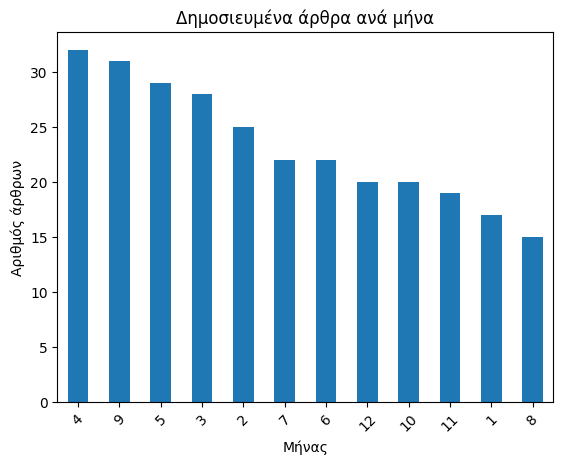

In [ ]:

short_newsit_df['month'].value_counts().plot(kind='bar')

plt.title('Δημοσιευμένα άρθρα ανά μήνα')
plt.xlabel('Μήνας')
plt.ylabel('Αριθμός άρθρων')
plt.xticks(rotation=45)
plt.show()


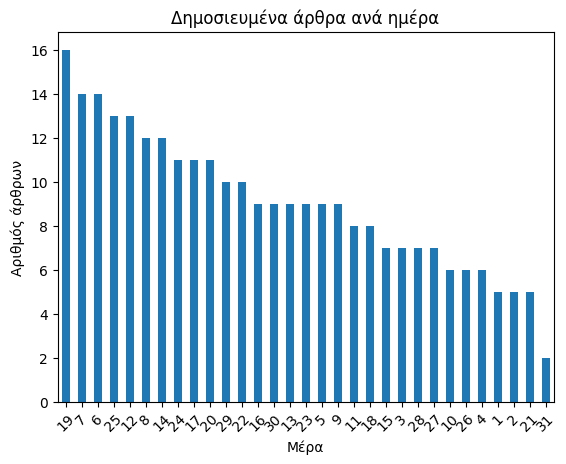

In [ ]:
short_newsit_df['day'].value_counts().plot(kind='bar')

plt.title('Δημοσιευμένα άρθρα ανά ημέρα')
plt.xlabel('Μέρα')
plt.ylabel('Αριθμός άρθρων')
plt.xticks(rotation=45)
plt.show()

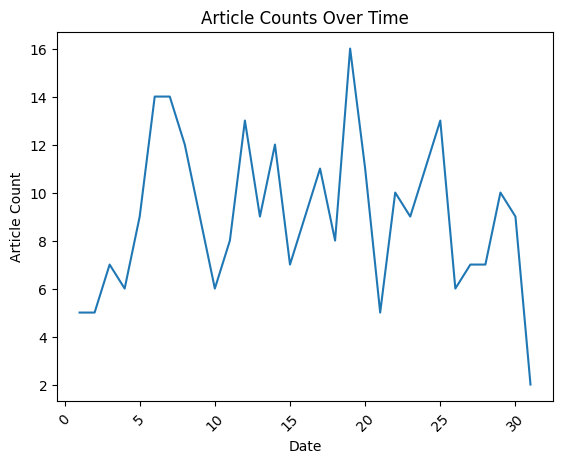

In [ ]:
import matplotlib.pyplot as plt

article_counts = short_newsit_df.groupby('day').size()

plt.plot(article_counts.index, article_counts.values)

plt.title('Article Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Article Count')
plt.xticks(rotation=45)
plt.show()

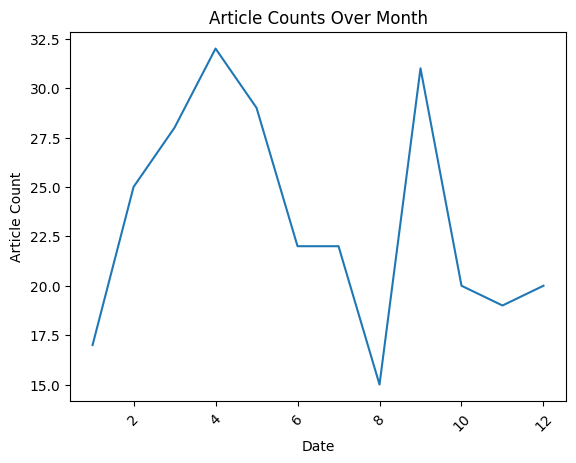

In [ ]:
article_counts = short_newsit_df.groupby('month').size()

plt.plot(article_counts.index, article_counts.values)

plt.title('Article Counts Over Month')
plt.xlabel('Date')
plt.ylabel('Article Count')
plt.xticks(rotation=45)
plt.show()

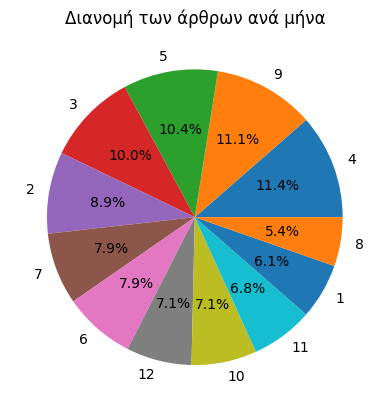

In [ ]:
import matplotlib.pyplot as plt

month_counts = short_newsit_df['month'].value_counts()

# Plotting the pie chart
plt.pie(month_counts, labels=month_counts.index, autopct='%1.1f%%')

# Set the chart title
plt.title('Διανομή των άρθρων ανά μήνα')

# Display the chart
plt.show()


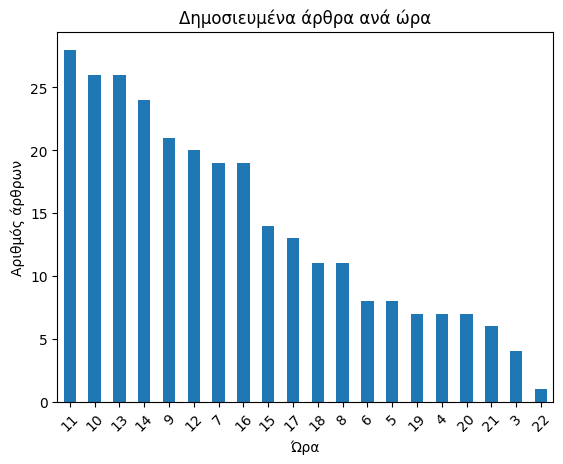

In [ ]:
short_newsit_df['hour'].value_counts().plot(kind='bar')

plt.title('Δημοσιευμένα άρθρα ανά ώρα')
plt.xlabel('Ώρα')
plt.ylabel('Αριθμός άρθρων')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Αξιοποιήστε την διανυσματοποίηση των κειμένων σας (CountVectorizer()), και τη χρήση της ομοιότητας κειμένων μέσω της συνάρτησης cosine_similarity() ώστε να βρείτε άρθρα που έχουν μεγάλη ομοιότητα. Παρουσιάστε τη συσχέτισηαυτή μέσω γραφήματος τύπου heatmap.
#Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(short_newsit_df['full_text'])

In [ ]:
count_vector.shape

(280, 27898)

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,000τμ,000χλμ,00θεατρική,00μμ,00μουσικοθεατρική,00συναυλία,00συναυλίακώστας,00συναυλίαμανώλης,...,ώσπου,ώστε,ώχρας,ἀγωγή,ἀθανάτοισι,ἀργεῖοι,ἀρχαίων,ἑλληνική,ἑλληνικῶν,ῥεῖ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

In [ ]:
count_vector = cv.fit_transform(short_newsit_df['full_text'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,000τμ,000χλμ,00θεατρική,00μμ,00μουσικοθεατρική,00συναυλία,00συναυλίακώστας,00συναυλίαμανώλης,...,ώριμοι,ώς,ώχρας,ἀγωγή,ἀθανάτοισι,ἀργεῖοι,ἀρχαίων,ἑλληνική,ἑλληνικῶν,ῥεῖ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [ ]:
count_vector = cv.fit_transform(short_newsit_df['full_text'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()


,00,000,00θεατρική,00συναυλία,01,02,03,04,05,057,...,ύλης,ύμνος,ύμνου,ύπαρξη,ύφος,ύψος,ύψους,ώθηση,ώρα,ώρες
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(short_newsit_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,000,newsit,αθηναίων,βουλευτής,δύο,είπε,ειδησεις,ελλάδα,ζωή,θέατρο,ιστορία,μεγάλη,ολες,πολιτισμού,πολιτισμός,πρόγραμμα,πρόεδρος,σήμερα,χρόνια,χώρα
0,0,1,0,0,0,0,1,0,0,0,0,1,1,2,2,0,0,2,2,0
1,0,2,0,2,2,1,1,2,5,0,0,0,1,1,1,1,0,0,1,2
2,3,1,0,0,1,0,1,2,0,0,0,0,1,11,1,0,0,0,0,0
3,0,1,0,0,0,2,1,0,0,0,0,0,1,0,1,0,2,1,0,0
4,2,1,0,0,0,0,1,2,0,0,0,0,1,0,1,2,0,2,0,3


In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_newsit_df['full_text'])
results2 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results2.head()

,000 ευρώ,freedom pass,newsit ελλαδα,newsit κοσμος,newsit πολιτικη,newsit τοπικα,απε μπε,δήμαρχος αθηναίων,δήμος αθηναίων,δήμου αθηναίων,εκατ ευρώ,κυριάκος μητσοτάκης,κώστας μπακογιάννης,λίνα μενδώνη,μπε ολες,ολες ειδησεις,πολιτισμού αθλητισμού,πρώην βουλευτής,τοπικα νεα,υπουργός πολιτισμού
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,5,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0


In [ ]:
results2.sum(axis =0).sort_values(ascending = False)

ολες ειδησεις            270
newsit ελλαδα             99
δήμου αθηναίων            66
κυριάκος μητσοτάκης       66
απε μπε                   61
newsit πολιτικη           55
πολιτισμού αθλητισμού     46
λίνα μενδώνη              38
000 ευρώ                  34
newsit κοσμος             34
δήμος αθηναίων            32
κώστας μπακογιάννης       32
δήμαρχος αθηναίων         31
μπε ολες                  31
πρώην βουλευτής           30
freedom pass              28
υπουργός πολιτισμού       27
newsit τοπικα             26
τοπικα νεα                26
εκατ ευρώ                 26
dtype: int64

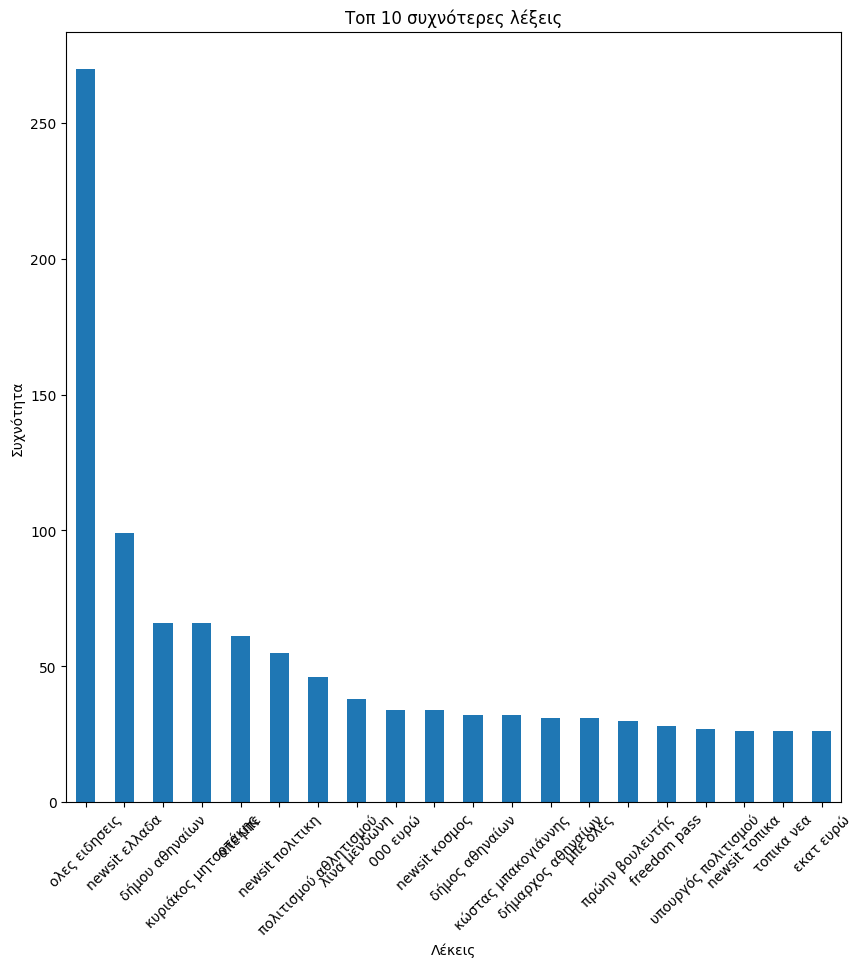

In [ ]:
import matplotlib.pyplot as plt

# Compute the sum of each column and sort in descending order
word_frequencies =results2.sum(axis=0).sort_values(ascending=False)

# Select the top 10 most frequent words
top_20_words = word_frequencies.head(20)

# Plot the bar chart
plt.figure(figsize=(10, 10))
top_20_words.plot(kind='bar')
plt.xlabel('Λέκεις')
plt.ylabel('Συχνότητα')
plt.title('Τοπ 10 συχνότερες λέξεις')
plt.xticks(rotation=45)
plt.show()


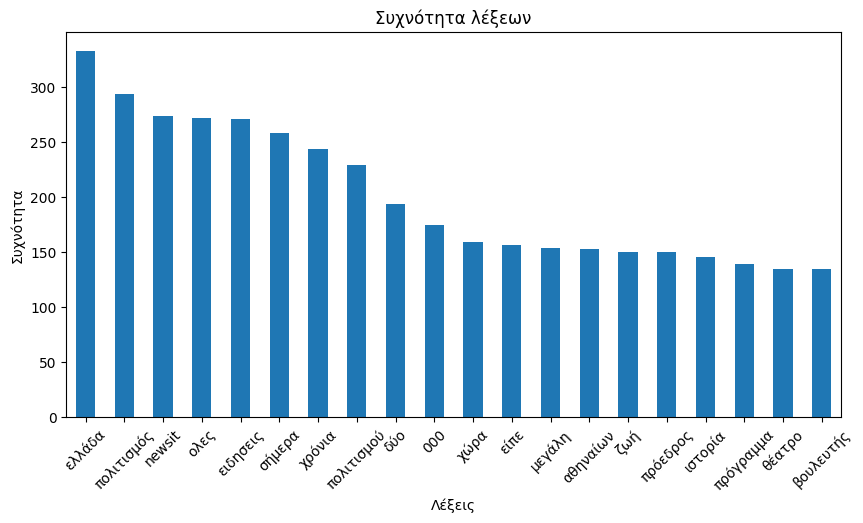

In [ ]:
import matplotlib.pyplot as plt

# Compute the sum of each column and sort in descending order
word_frequencies = results.sum(axis=0).sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 5))
word_frequencies.plot(kind='bar')
plt.xlabel('Λέξεις')
plt.ylabel('Συχνότητα')
plt.title('Συχνότητα λέξεων')
plt.xticks(rotation=45)
plt.show()


In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()


ελλάδα        333
πολιτισμός    294
newsit        274
ολες          272
ειδησεις      271
dtype: int64

In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,
                     vocabulary = ['ειδήσεις', 'πολιτισμός', 'αθηναίων', 'θέατρο'])
count_vector = cv.fit_transform(short_newsit_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,ειδήσεις,πολιτισμός,αθηναίων,θέατρο
0,0,2,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_newsit_df['full_text'])

In [ ]:
import spacy

# Load the pre-trained NER model
nlp = spacy.load("en_core_web_sm")

# Process the article text
article_text = "..."  # Replace with the actual article text
doc = nlp(article_text)

# Extract company names
results2 = [ent.text for ent in doc.ents if ent.label_ == "ORG"]

# Print the extracted company names
for company in results2:
    print(company)

In [ ]:
ΟΜΟΙΟΤΗΤΑ ΚΕΙΜΕΝΩΝ

SyntaxError: ignored

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.00000000e+00 3.74079800e-02 4.89389465e-02 3.54120014e-02
  1.30430211e-02 1.04302346e-01 1.54101230e-02 1.14546316e-01
  8.74724749e-02 4.05501606e-02 5.97943194e-02 1.09577051e-01
  1.74604059e-01 1.68703350e-02 4.10957316e-02 1.81202839e-01
  2.65613134e-02 2.22145376e-02 6.75459737e-02 3.05567120e-02
  1.13649138e-01 1.78283209e-01 1.20686797e-01 9.63178908e-02
  1.27666476e-01 1.36177003e-01 1.34396526e-02 3.34440586e-02
  2.73725568e-04 5.98967847e-02 6.75509443e-02 1.35410016e-02
  5.56783583e-02 4.21955915e-02 7.43531361e-02 7.51732132e-03
  3.72465669e-02 1.34393985e-01 1.64555447e-02 5.28258743e-02
  2.00367989e-01 2.10632904e-02 6.37406240e-02 3.05850803e-02
  2.29692782e-01 1.00821124e-01 2.31207093e-02 1.11491834e-02
  2.92207614e-02 2.47433767e-01 1.93987970e-02 9.69356741e-02
  2.30367089e-02 4.09143043e-02 2.34672422e-02 4.54765078e-02
  2.27502198e-01 1.05335691e-01 1.71339007e-01 5.01429288e-02
  7.03961395e-02 3.31445757e-02 6.27104520e-02 1.88

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud
import seaborn as sns

In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

<Axes: >

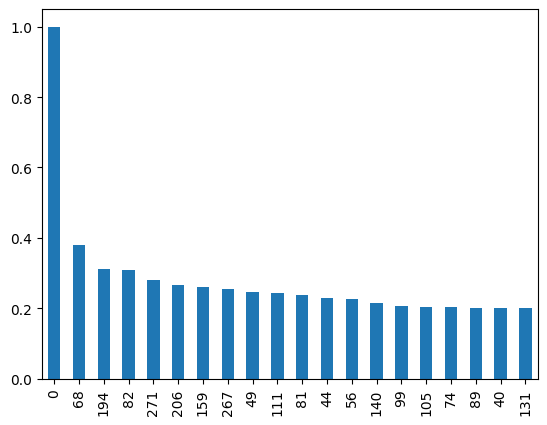

In [ ]:
#ποια άρθρα μοιάζουν περισσότερο με το πρώτο
pd.DataFrame(arr).loc[0].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [ ]:
short_newsit_df['full_text'].loc[0]

'NewsIT Κοσμος Μεγαλη εκθεση στο Βερολινο με ευρηματα της παρουσιας του Μεγαλου Αλεξανδρου σε Ουζμπεκισταν και Κεντρικη Ασια Μια μεγάλη έκθεση με ευρήματα της ιστορικής παρουσίας και της κληρονομιάς που άφησε ο Μέγας Αλέξανδρος στο Ουζμπεκιστάν και στην Κεντρική Ασία διεξάγεται στο νησί των μουσείων του Βερολίνου και περιλαμβάνει αρχαία ευρήματα με ελληνικό χρώμα. Αγγεία ελληνικής τεχνοτροπίας, νομίσματα με ονόματα τοπικών βασιλέων στα ελληνικά, ένας λουτήρας δείγμα ελληνικού τρόπου ζωής, αγάλματα του Βούδα βασισμένα σε ελληνιστικά πρότυπα. Αυτά είναι μερικά μόνο από τα αρχαιολογικά ευρήματα τα οποία παρουσιάζονται -εν μέρει για πρώτη φορά στη Δύση – στην έκθεση «Αρχαιολογικοί θησαυροί από το Ουζμπεκιστάν – Από τον Μ. Αλέξανδρο στην Βασιλεία Κοσσανών» που διεξάγεται στο νησί των μουσείων του Βερολίνου.  Πρόκειται για χαρακτηριστικά τεκμήρια της ιστορικής παρουσίας και της επιρροής του Μεγάλου Αλεξάνδρου του ελληνικού πολιτισμού στην περιοχή του Ουζμπεκιστάν και της Κεντρικής Ασίας. Στη

In [ ]:
short_newsit_df['full_text'].loc[8]

'NewsIT Ελλαδα Το Ιονιο Πανεπιστημιο «ανοιξε τα φτερα του» στη Νεα Υορκη Η ίδρυση του πρώτου γραφείου ελληνικού ΑΕΙ στις ΗΠΑ, είναι γεγονός! Και το έκανε το Ιόνιο Πανεπιστήμιο. Το Ιόνιο Πανεπιστημίο δημιούργησε γραφείο διασύνδεσης στη Νέα Υόρκη, ο οποίο αναλαμβάνει να στηρίξει το απαιτητικό έργο της εξωστρέφειας του ακαδημαϊκού ιδρύματος.  Η συγκεκριμένη προσπάθεια βρίσκεται σε εξέλιξη μέσω συνομιλιών με κορυφαία αμερικανικά πανεπιστήμια (Johns Hopkins, George Mason, University of Texas Health Science Center) στο πλαίσιο της ανάπτυξης διεθνών ερευνητικών συνεργασιών. Το γραφεία διασύνδεσης θα διευκολύνει ακριβώς αυτή την ανάγκη επικοινωνίας με τα αμερικανικά πανεπιστήμια μέσω της δημιουργίας ενός ακαδημαϊκού και διοικητικού κόμβου. Στόχος είναι να ενισχυθεί η υπάρχουσα συνεργασία σε ερευνητικό επίπεδο μέσω της εύκολης εξαγωγής, διαχείρισης και μεταφοράς αρχειακού υλικού ή επιστημονικών δεδομένων. Επιπλέον, σε ένα μεταγενέστερο στάδιο το γραφείο θα μπορέσει να στηρίξει εκπαιδευτικές συν

In [ ]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10])

<Axes: title={'center': 'Βαθμός ομοιότητας των 20 πρώτων άρθρων'}>

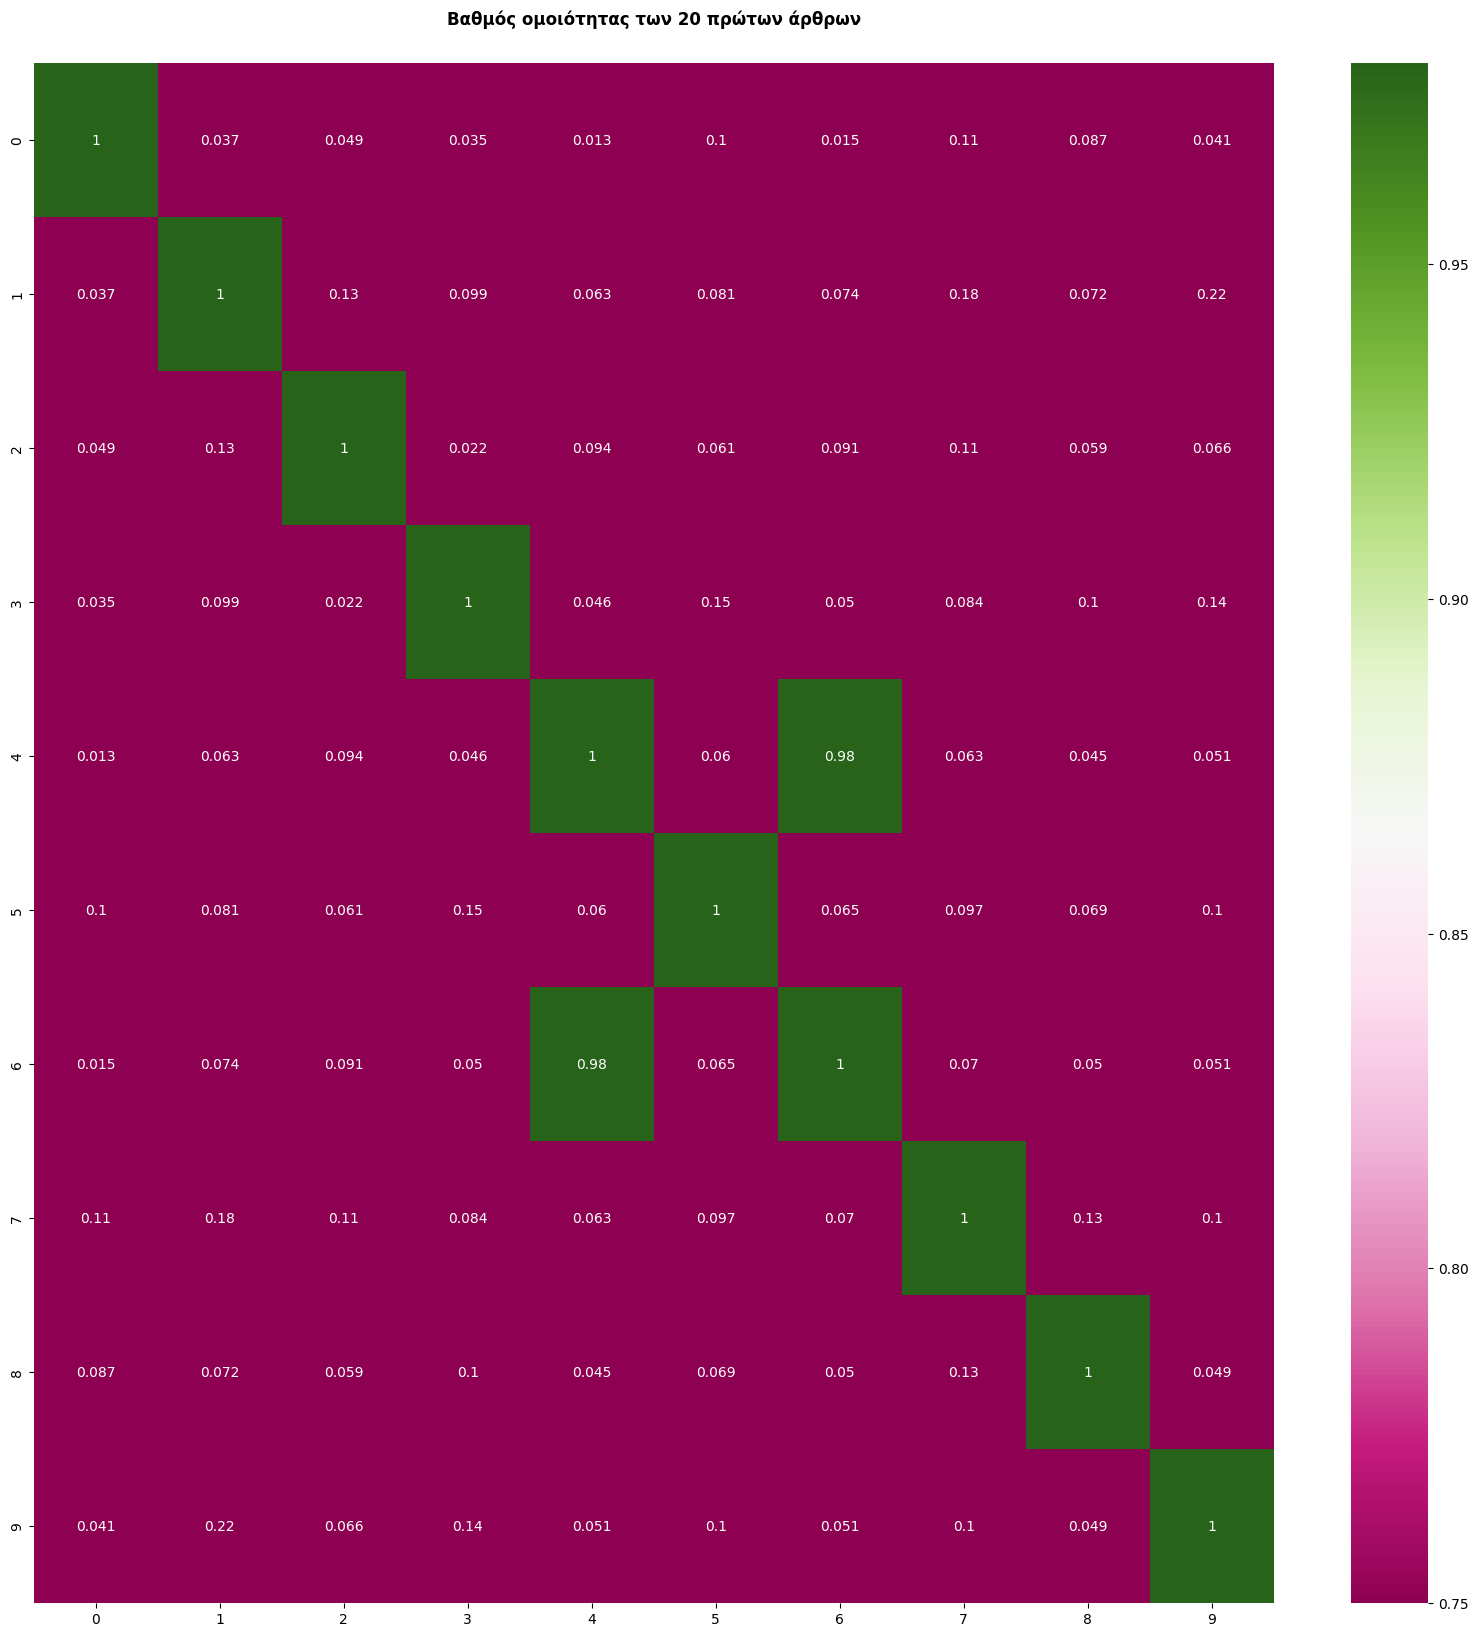

In [ ]:
plt.figure(figsize=(20, 20))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 20 πρώτων άρθρων', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα
sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")

#plt.savefig('<το path και το όνομα του αρχείου>.png')

In [ ]:
 #Κάνοντας χρήση του ελληνικού λεξικού για sentiment anaysis του NRC βρείτε την πολικότητα (θετική - αρνητική) και τα συναισθήματα των κειμένων σας, και αποθηκεύστε τα σε νέες στήλες στο dataframe των δεδομένων σας.

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week9/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head()

,word,emotion,association
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0


In [ ]:
emolex_df.emotion.unique()

array(['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
       'positive', 'sadness', 'surprise', 'trust'], dtype=object)

In [ ]:
emolex_df[emolex_df.association == 1].emotion.value_counts()

negative        3324
positive        2312
fear            1476
anger           1247
trust           1231
sadness         1191
disgust         1058
anticipation     839
joy              689
surprise         534
Name: emotion, dtype: int64

In [ ]:
emolex_df[(emolex_df.association == 1) & (emolex_df.emotion == 'anger')].word

30          abandoned
40        abandonment
170             abhor
180         abhorrent
270           abolish
             ...     
141220       wrongful
141230        wrongly
141470           yell
141500           yelp
141640          youth
Name: word, Length: 1247, dtype: object

In [ ]:
emolex_words = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_words.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,NaN,0,0,0,0,0,0,0,0,0,0
1,aback,0,0,0,0,0,0,0,0,0,0
2,abacus,0,0,0,0,0,0,0,0,0,1
3,abandon,0,0,0,1,0,1,0,1,0,0
4,abandoned,1,0,0,1,0,1,0,1,0,0


In [ ]:
emolex_words[emolex_words.word == 'charitable']

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
2002,charitable,0,1,0,0,1,0,1,0,0,1


In [ ]:
emolex_words[emolex_words.anger == 1].head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
4,abandoned,1,0,0,1,0,1,0,1,0,0
5,abandonment,1,0,0,1,0,1,0,1,1,0
18,abhor,1,0,1,1,0,1,0,0,0,0
19,abhorrent,1,0,1,1,0,1,0,0,0,0
28,abolish,1,0,0,0,0,1,0,0,0,0


In [ ]:
emolex_words[(emolex_words.joy == 1) & (emolex_words.negative == 1)].head()


emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
62,abundance,0,1,1,0,1,1,1,0,0,1
1019,balm,0,1,0,0,1,1,1,0,0,0
1383,boisterous,1,1,0,0,1,1,1,0,0,0
1917,celebrity,1,1,1,0,1,1,1,0,1,1
2005,charmed,0,0,0,0,1,1,1,0,0,0


In [ ]:
emolex_words[emolex_words.anger == 1].word

4          abandoned
5        abandonment
18             abhor
19         abhorrent
28           abolish
            ...     
14122       wrongful
14123        wrongly
14147           yell
14150           yelp
14164          youth
Name: word, Length: 1247, dtype: object

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import time
import os
import ast
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

In [ ]:
df = newsit_full_articles_df

In [ ]:
df.columns

Index(['site', 'url', 'title', 'date', 'author', 'full_text', 'clean_text',
       'datetime'],
      dtype='object')

In [ ]:
print("Number of articles scraped (before cleaning): ", df.shape[0])

Number of articles scraped (before cleaning):  280


In [ ]:
df.dtypes

site                       object
url                        object
title                      object
date          datetime64[ns, UTC]
author                     object
full_text                  object
clean_text                 object
datetime                   object
dtype: object

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.shape

(280, 8)

In [ ]:
df['author'].value_counts().head(10)

newsit.gr    280
Name: author, dtype: int64

<Axes: >

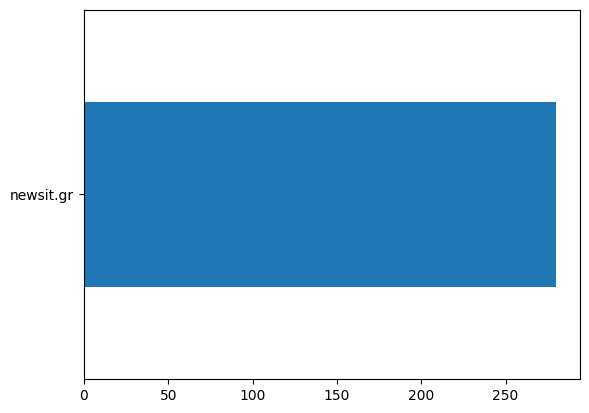

In [ ]:
df['author'].value_counts().head(10).sort_values().plot(kind='barh')

In [ ]:
df = df.replace(np.nan, '0')

In [ ]:
df[df.full_text.isnull()].shape


(0, 8)

In [ ]:
df['date'] =  pd.to_datetime(df['date'] )

In [ ]:
df.dtypes

site                       object
url                        object
title                      object
date          datetime64[ns, UTC]
author                     object
full_text                  object
clean_text                 object
datetime                   object
dtype: object

In [ ]:
df.rename(columns={'full_text': 'body'}, inplace=True)

In [ ]:
import string
def clean_text(article):
    clean1 = sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return sub(r'\W+', ' ', clean1)

In [ ]:
df['tokenized'] = df['body'].map(lambda x: clean_text(x))

NameError: ignored

In [ ]:
df.body = [str (item) for item in df['body']]

In [ ]:
ΛΕΞΕΙΣ/ΑΡΘΡΑ

NameError: ignored

In [ ]:
df['num_wds'] = df['tokenized'].apply(lambda x: len(x.split()))
df['num_wds'].mean()

KeyError: ignored

In [ ]:
ax=df['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

KeyError: ignored

In [ ]:
df['uniq_wds'] = df['tokenized'].str.split().apply(lambda x: len(set(x)))
df['uniq_wds'].head()

KeyError: ignored

In [ ]:
df['uniq_wds'].mean()

KeyError: ignored

In [ ]:
ax=df['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Unique Words Per Article\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);

KeyError: ignored

In [ ]:
from collections import Counter

wd_counts = Counter()
for i, row in df.iterrows():
    wd_counts.update(row['tokenized'].split())

KeyError: ignored

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

# Your code for removing stopwords
for sw in stopwords:
    del wd_counts[sw]

In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Your code for removing stopwords
for sw in stop_words:
    del wd_counts[sw]

In [ ]:
for sw in stopwords.words('english'):
    del wd_counts[sw]

In [ ]:
wd_counts.most_common(30)

[]

In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['tokenized'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

KeyError: ignored

In [ ]:
import nltk


In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
df.head(1)

,site,url,title,date,author,body,clean_text,datetime
0,newsit.gr,https://www.newsit.gr/kosmos/verolino-ekthesi-...,Βερολίνο: Έκθεση με ευρήματα της παρουσίας του...,2023-05-13 14:30:23+00:00,newsit.gr,NewsIT Κοσμος Μεγαλη εκθεση στο Βερολινο με ευ...,NewsIT Κοσμος Μεγαλη εκθεση στο Βερολινο με ευ...,2023-05-13 17:30:23+03:00


In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [ ]:
emolex_df.tail()


,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import spacy

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
len(df)

280

In [ ]:
df_shorted = newsit_full_articles_df[['date', 'full_text']]

In [ ]:
df_shorted.tail()

,date,full_text
275,2021-03-11 11:41:56+00:00,NewsIT Οικονομια Επιστρεπτεα προκαταβολη 7: Πο...
276,2021-02-26 14:18:34+00:00,NewsIT Ελλαδα Ενωση Σκηνοθετων: Πολιτεια και Δ...
277,2021-02-23 08:58:07+00:00,NewsIT Ελλαδα Δημος Αθηναιων: Σε αυτους τους δ...
278,2021-02-22 08:11:37+00:00,NewsIT Πολιτικη Βοζεμπεργκ για Μενδωνη: Οφειλε...
279,2021-02-21 10:28:55+00:00,NewsIT Ελλαδα ΣΕΗ κατα Μενδωνη: Δεν ξερουμε αν...


In [ ]:
df_shorted.dtypes

date         datetime64[ns, UTC]
full_text                 object
dtype: object

In [ ]:
emolex_df['word'].head(3)


0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(df_shorted['full_text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df.shape

(280, 13161)

In [ ]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df[emolex_df.Anger == 1].tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
trust_words

8                        αμην
15             γαμηλιο ταξιδι
24       διευθυντρια σχολειου
38                 επικοινωνω
45                   εκκλησια
                 ...         
13039                  αληθης
13075             αναμφιβολως
13079             ανυπερβατος
13113            αναθηματικος
13114       αποδειξη πληρωμης
Name: word, Length: 1259, dtype: object

In [ ]:
wordcount_df.tail(1)

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df[trust_words].tail(1)

,αμην,γαμηλιο ταξιδι,διευθυντρια σχολειου,επικοινωνω,εκκλησια,εν τω μεταξυ,ευαγγελιο,κυριε,λιστα ελεγχου,λυρικη σκηνη,...,ηλιακο ωρολογιο,συνεργιστικος,διπλο ποδηλατο,ισαξιος,ανακωχη,αληθης,αναμφιβολως,ανυπερβατος,αναθηματικος,αποδειξη πληρωμης
279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df[trust_words].sum(axis=1)

0      16
1      13
2      11
3      12
4      10
       ..
275     1
276     6
277     5
278     2
279    40
Length: 280, dtype: int64

In [ ]:
df_shorted['anger'] = wordcount_df[angry_words].sum(axis=1)
df_shorted['positive'] = wordcount_df[positive_words].sum(axis=1)

df_shorted['joy'] = wordcount_df[joy_words].sum(axis=1)

df_shorted['disgust'] = wordcount_df[disgust_words].sum(axis=1)

df_shorted['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df_shorted['trust'] = wordcount_df[trust_words].sum(axis=1)

df_shorted['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
df_shorted['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df_shorted['negative'] = wordcount_df[negative_words].sum(axis=1)

df_shorted['fear'] = wordcount_df[fear_words].sum(axis=1)

<ipython-input-166-3ab8bbec584d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shorted['anger'] = wordcount_df[angry_words].sum(axis=1)
<ipython-input-166-3ab8bbec584d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shorted['positive'] = wordcount_df[positive_words].sum(axis=1)
<ipython-input-166-3ab8bbec584d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
df_shorted

,date,full_text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2023-05-13 14:30:23+00:00,NewsIT Κοσμος Μεγαλη εκθεση στο Βερολινο με ευ...,2,26,6,3,3,16,4,5,12,5
1,2023-05-10 12:47:51+00:00,NewsIT Videos Ζωη Ραπτη στο newsit.gr: «Ο πολι...,2,15,6,1,0,13,4,6,11,4
2,2023-05-10 12:12:06+00:00,NewsIT Οικονομια Σε πολιτισμο και χειροτεχνια ...,6,9,1,3,0,11,2,0,14,3
3,2023-05-09 07:41:29+00:00,NewsIT Κοσμος «Εναντιον της πατριδας μας εξαπο...,6,15,8,3,4,12,10,6,14,9
4,2023-05-08 16:00:00+00:00,NewsIT Ελλαδα Ηλεκτρικα οχηματα: Ανοιγει η πλα...,6,20,1,5,3,10,9,3,11,8
...,...,...,...,...,...,...,...,...,...,...,...,...
275,2021-03-11 11:41:56+00:00,NewsIT Οικονομια Επιστρεπτεα προκαταβολη 7: Πο...,1,4,3,2,3,1,3,0,2,3
276,2021-02-26 14:18:34+00:00,NewsIT Ελλαδα Ενωση Σκηνοθετων: Πολιτεια και Δ...,3,8,0,4,3,6,5,3,8,5
277,2021-02-23 08:58:07+00:00,NewsIT Ελλαδα Δημος Αθηναιων: Σε αυτους τους δ...,1,12,4,3,0,5,3,4,4,3
278,2021-02-22 08:11:37+00:00,NewsIT Πολιτικη Βοζεμπεργκ για Μενδωνη: Οφειλε...,3,5,2,2,5,2,3,3,10,4


In [ ]:
df_shorted.reset_index(inplace=True)
df_shorted.set_index('date', inplace=True)
df_shorted

,index,full_text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
date,,,,,,,,,,,,
2023-05-13 14:30:23+00:00,0,NewsIT Κοσμος Μεγαλη εκθεση στο Βερολινο με ευ...,2,26,6,3,3,16,4,5,12,5
2023-05-10 12:47:51+00:00,1,NewsIT Videos Ζωη Ραπτη στο newsit.gr: «Ο πολι...,2,15,6,1,0,13,4,6,11,4
2023-05-10 12:12:06+00:00,2,NewsIT Οικονομια Σε πολιτισμο και χειροτεχνια ...,6,9,1,3,0,11,2,0,14,3
2023-05-09 07:41:29+00:00,3,NewsIT Κοσμος «Εναντιον της πατριδας μας εξαπο...,6,15,8,3,4,12,10,6,14,9
2023-05-08 16:00:00+00:00,4,NewsIT Ελλαδα Ηλεκτρικα οχηματα: Ανοιγει η πλα...,6,20,1,5,3,10,9,3,11,8
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-11 11:41:56+00:00,275,NewsIT Οικονομια Επιστρεπτεα προκαταβολη 7: Πο...,1,4,3,2,3,1,3,0,2,3
2021-02-26 14:18:34+00:00,276,NewsIT Ελλαδα Ενωση Σκηνοθετων: Πολιτεια και Δ...,3,8,0,4,3,6,5,3,8,5
2021-02-23 08:58:07+00:00,277,NewsIT Ελλαδα Δημος Αθηναιων: Σε αυτους τους δ...,1,12,4,3,0,5,3,4,4,3


<Axes: xlabel='date'>

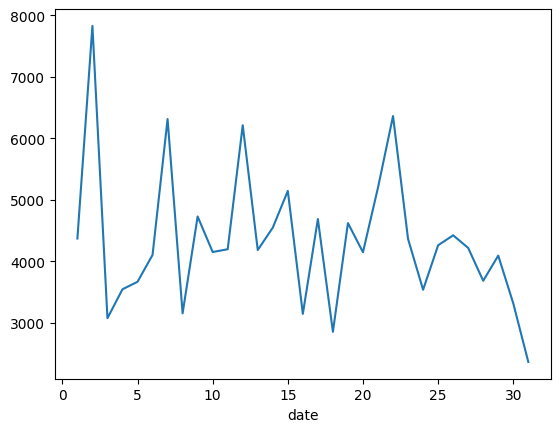

In [ ]:
df_shorted['full_text'].str.len().groupby(by=df_shorted.index.day).mean().plot()

<Axes: xlabel='date'>

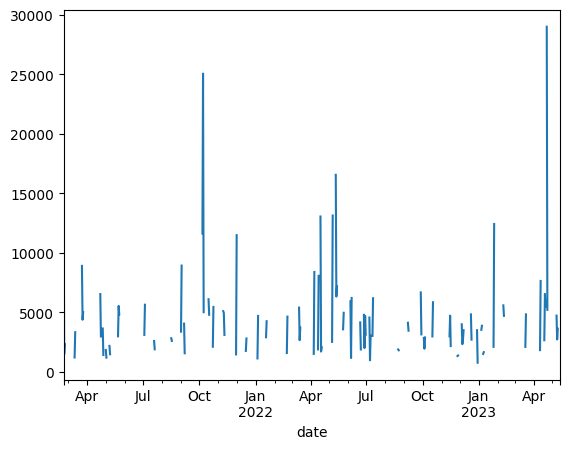

In [ ]:
df_shorted['full_text'].str.len().resample('D').mean().plot()

<Axes: xlabel='date'>

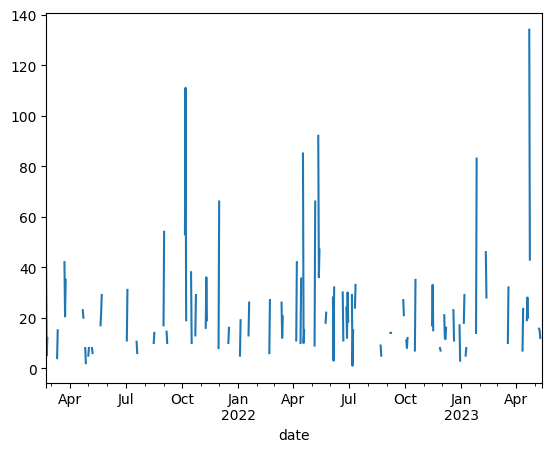

In [ ]:
df_shorted['positive'].resample('D').mean().plot()

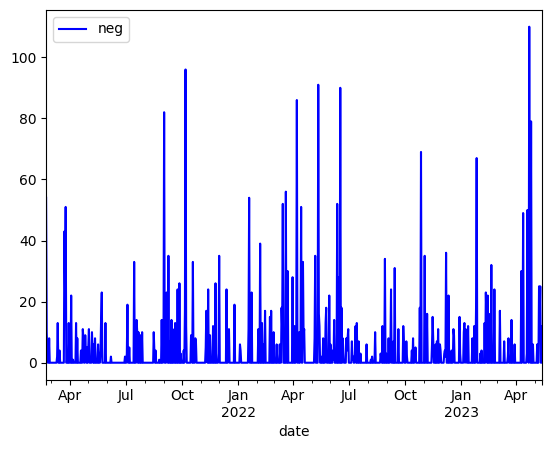

In [ ]:
df_shorted['negative'].resample('D').sum().plot(color = 'b',label = 'neg').legend()

<Axes: xlabel='date'>

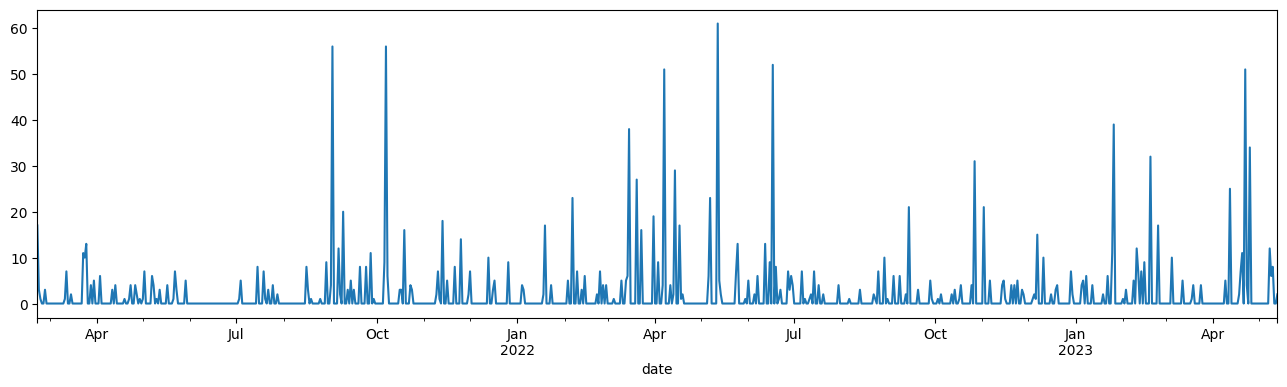

In [ ]:
df_shorted['anger'].resample('D').sum().plot(figsize=(16,4))

<Axes: xlabel='date'>

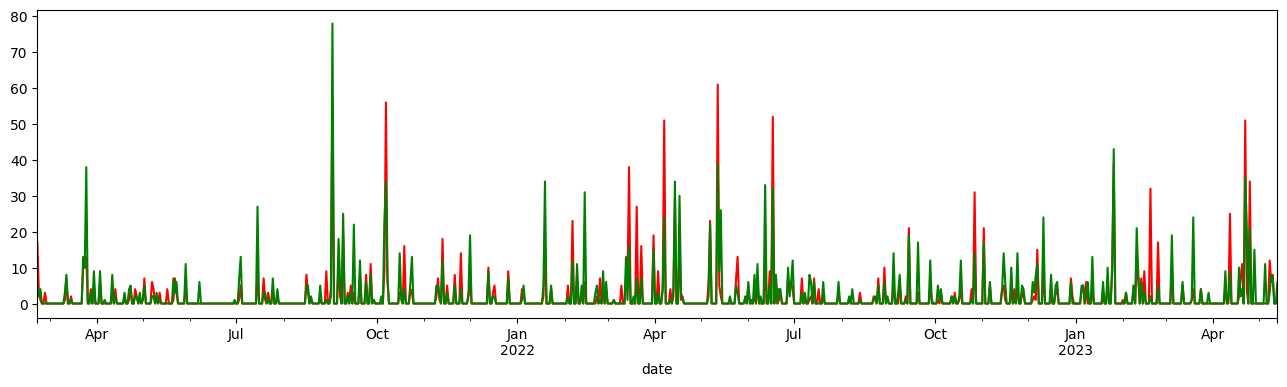

In [ ]:
ax = df_shorted['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
df_shorted['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')

<Axes: xlabel='date'>

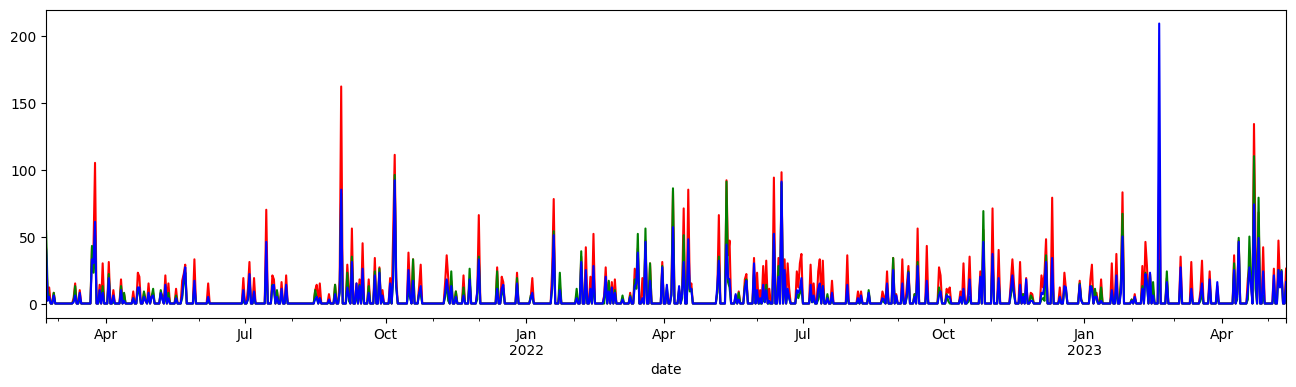

In [ ]:
ax = df_shorted['positive'].resample('D').sum().plot(figsize=(16,4), color = 'red')
df_shorted['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
df_shorted['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [ ]:
#plt.style.use('classic')
#plt.style.use('ggplot')
plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-v0_8-bright')

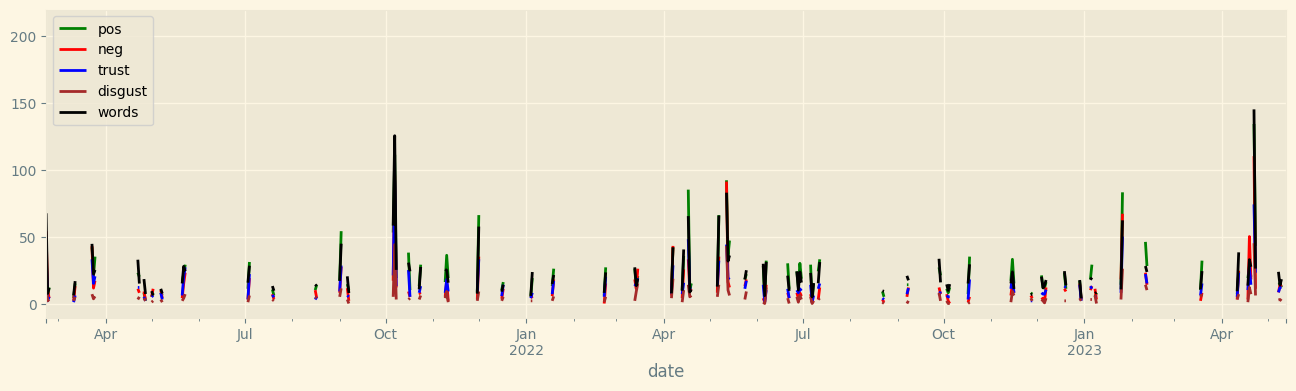

In [ ]:
ax = df_shorted['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
df_shorted['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
df_shorted['trust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
df_shorted['disgust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(df_shorted['full_text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

In [ ]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='date'>

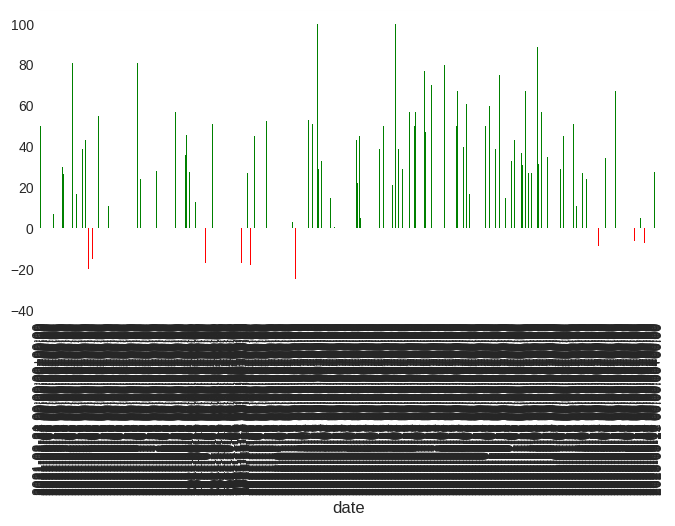

In [ ]:
df_shorted['(-)αρνητικότητα | θετικότητα(+)'] = df_shorted.positive*100//df_shorted[['positive','negative']].sum(
        axis=1) - df_shorted.negative*100//df_shorted[['positive','negative']].sum(axis=1)

df_shorted['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(df_shorted['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

In [ ]:
df_shorted[(df_shorted['(-)αρνητικότητα | θετικότητα(+)'] == df_shorted['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (df_shorted['(-)αρνητικότητα | θετικότητα(+)'] == df_shorted['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

,index,positive,negative,(-)αρνητικότητα | θετικότητα(+)
date,,,,
2022-12-06 09:23:07+00:00,56,8,0,100
2022-10-05 11:05:05+00:00,76,12,0,100
2022-06-09 11:45:14+00:00,124,11,0,100
2022-06-03 09:18:15+00:00,128,10,0,100
2022-02-21 11:28:56+00:00,165,6,0,100
2021-09-27 03:59:35+00:00,207,3,13,-63


In [ ]:
newsit_full_articles_df.loc[[4,28,33,59,96,127,140,158,178,207,226,237], ['url','title', 'full_text']]

,url,title,full_text
4,https://www.newsit.gr/ellada/ilektrika-oximata...,Ηλεκτρικά οχήματα: Ανοίγει η πλατφόρμα fortizo...,NewsIT Ελλαδα Ηλεκτρικα οχηματα: Ανοιγει η πλα...
28,https://www.newsit.gr/politikh/syriza-sti-dimo...,ΣΥΡΙΖΑ: Στη δημοσιότητα το 75% των ψηφοδελτίων...,NewsIT Πολιτικη ΣΥΡΙΖΑ: Στη δημοσιοτητα το 75%...
33,https://www.newsit.gr/politikh/aleksis-tsipras...,Αλέξης Τσίπρας: Η κυβέρνηση βάζει στο στόχαστρ...,NewsIT Πολιτικη Αλεξης Τσιπρας: Η κυβερνηση βα...
59,https://www.newsit.gr/ellada/arxaia-ilida-arxa...,Αρχαία Ήλιδα – Αρχαία Ολυμπία: Το πέρασμα σε μ...,NewsIT Ελλαδα Αρχαια Ηλιδα – Αρχαια Ολυμπια: Τ...
96,https://www.newsit.gr/megales-epixeiriseis/Pel...,Peloponnese Food Stories: Στο Άστρος ο 3ος στα...,NewsIT Μεγαλες Επιχειρησεις Peloponnese Food S...
127,https://www.newsit.gr/ellada/i-protomi-tou-poi...,Η προτομή του ποιητή της θάλασσας Νίκου Καββαδ...,NewsIT Ελλαδα Η προτομη του ποιητη της θαλασσα...
140,https://www.newsit.gr/kosmos/perou-anthropothy...,Περού: Ανθρωποθυσίες παιδιών 1000 χρόνια πριν ...,NewsIT Κοσμος Περου: Ανθρωποθυσιες παιδιων 100...
158,https://www.newsit.gr/ellada/kyriaki-tis-ortho...,Κυριακή της Ορθοδοξίας: Ο εορτασμός στη Μητρόπ...,NewsIT Ελλαδα Κυριακη της Ορθοδοξιας: Ο εορτασ...
178,https://www.newsit.gr/media/giorgos-liagkas-gi...,Γιώργος Λιάγκας για Χατζηαγγελάκη: Αυτές οι φά...,NewsIT Media Γιωργος Λιαγκας για Χατζηαγγελακη...
207,https://www.newsit.gr/oikonomia/foroelafrynsei...,Φοροελαφρύνσεις: Μείωση ΦΠΑ και κατάργηση φόρο...,NewsIT Οικονομια Φοροελαφρυνσεις: Μειωση ΦΠΑ κ...


In [ ]:
df.to_csv('news_clean.csv', index = False)